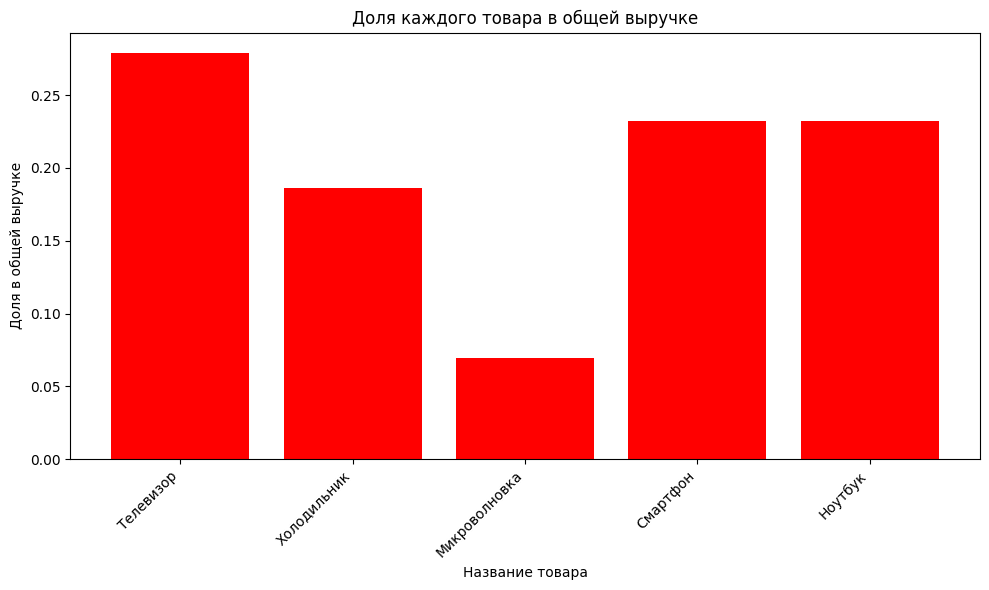

Общая выручка магазина: 215000.0
Товар, который был продан наибольшее количество раз: Смартфон (5 раз)
Товар, который принес наибольшую выручку: Телевизор (60000.0)
Информация по каждому товару:
Телевизор: Продано 60000.0 раз, доля в общей выручке: 27.91%
Холодильник: Продано 40000.0 раз, доля в общей выручке: 18.60%
Микроволновка: Продано 15000.0 раз, доля в общей выручке: 6.98%
Смартфон: Продано 50000.0 раз, доля в общей выручке: 23.26%
Ноутбук: Продано 50000.0 раз, доля в общей выручке: 23.26%



In [6]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2][1]
    left = []
    right = []
    middle = []
    for i in arr:
      if i[1] < pivot:
        left.append(i)
      elif i[1] > pivot:
        right.append(i)
      else:
        middle.append(i)

    return quicksort(left) + middle + quicksort(right)

# Формирование отчёта
def generate_report(sales_data):

    total_sales = calculate_total_sales(sales_data)
    most_sold_product, most_sold_count = find_most_sold_product(sales_data)
    highest_revenue_product, highest_revenue = find_highest_saled_product(sales_data)

    report = f"Общая выручка магазина: {total_sales}\n"
    report += f"Товар, который был продан наибольшее количество раз: {most_sold_product} ({most_sold_count} раз)\n"
    report += f"Товар, который принес наибольшую выручку: {highest_revenue_product} ({highest_revenue})\n"

    # График доли в общей выручке для каждого товара
    product_sales_count = defaultdict(int)
    for row in sales_data:
        product_sales_count[row['Название товара']] += row['Общая стоимость']
    product_revenues = [product_sales_count[product] / total_sales for product in product_sales_count.keys()]

    # Генерация графика для визуализации
    plt.figure(figsize=(10, 6))
    plt.bar(product_sales_count.keys(), product_revenues, color='red')
    plt.xlabel('Название товара')
    plt.ylabel('Доля в общей выручке')
    plt.title('Доля каждого товара в общей выручке')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    report += "Информация по каждому товару:\n"
    for product, sales_count in product_sales_count.items():
        product_revenue = sum(row['Общая стоимость'] for row in sales_data if row['Название товара'] == product)
        report += f"{product}: Продано {sales_count} раз, доля в общей выручке: {product_revenue/total_sales:.2%}\n"

    return report

def read_sales_data(file_path):
    sales_data = []
    with open(file_path, newline='', encoding='windows-1251') as csv_file:
        reader = csv.reader(csv_file, delimiter=';')
        next(reader)  # Пропускаем заголовок и берём значение ячеек
        for row in reader:
            sales_data.append({
                'Номер заказа': int(row[0]),
                'Дата заказа': row[1],
                'Название товара': row[2],
                'Категория товара': row[3],
                'Количество продаж': int(row[4]),
                'Цена за единицу': float(row[5]),
                'Общая стоимость': float(row[6])
            })
    return sales_data

# Формирование общей выручки магазина
def calculate_total_sales(sales_data):
    total_sales = sum(row['Общая стоимость'] for row in sales_data)
    return total_sales

# Поиск самого продаваемого продукта
def find_most_sold_product(sales_data):
    product_sales_count = defaultdict(int)
    for row in sales_data:
        product_sales_count[row['Название товара']] += row['Количество продаж']

    sorted_products = quicksort(list(product_sales_count.items()))
    most_sold_product, most_sold_count = sorted_products[-1]
    return most_sold_product, most_sold_count

# Поиск товара с наибольшей выручкой
def find_highest_saled_product(sales_data):
    sorted_sales_data = sorted(sales_data, key=lambda product: product['Общая стоимость'])
    highest_revenue_product = sorted_sales_data[-1]['Название товара']
    highest_revenue = sorted_sales_data[-1]['Общая стоимость']
    return highest_revenue_product, highest_revenue


def main(file_path):
    try:
        sales_data = read_sales_data(file_path)
        report = generate_report(sales_data)
        print(report)
    except FileNotFoundError:
        print("Файл не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

file_path = 'sample_data/sales_data.csv'
main(file_path)